In [91]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
import numpy as np
from pprint import pprint

from sklearn.datasets import load_svmlight_file
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import nltk

import matplotlib.pyplot as plt

In [94]:
from data_loader import load_vocab_dict, load_train_data, load_test_data
from preprocessing import preprocess_reviews

In [104]:
Xte_text, Yte, Xva_text, Yva = load_train_data('./aclImdb/test/', 0.1)
Xtr_text = load_test_data('./aclImdb/train/')

In [111]:
# lets combine test/validation together for now, we can split up later for cross validation
reviews_te_clean = preprocess_reviews(Xte_text)
reviews_va_clean = preprocess_reviews(Xva_text)
reviews_te_clean.extend(reviews_va_clean)
Yte = np.append(Yte, Yva)
reviews_tr_clean = preprocess_reviews(Xtr_text)

## Vectorization

In [106]:
def vectorization(Xte, Xtr):
    cv = CountVectorizer(binary=True)
    cv.fit(Xte)
    Xte = cv.transform(Xte)
    Xtr = cv.transform(Xtr)
    return Xte, Xtr

In [108]:
Xte, Xtr = vectorization(reviews_te_clean, reviews_tr_clean)



# Sentiment

In [122]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kajdreef/nltk_data...


True

In [ ]:
s_analyszer = SentimentIntensityAnalyzer()

ss = s_analyszer.polarity_scores(review)
review_sentiment_te = []
review_sentiment_tr = []
print("Start test")
for r in reviews_te_clean:
    ss = s_analyszer.polarity_scores(r)
    review_sentiment_te.append([ss['neg'], ss['neu'], ss['pos'], ss['compound']])

print("Start train")
for r in reviews_tr_clean:
    ss = s_analyszer.polarity_scores(r)
    review_sentiment_tr.append([ss['neg'], ss['neu'], ss['pos'], ss['compound']])

Start test
Start train


In [ ]:
Xte = np.asarray(review_sentiment_te)
Xtr = np.asarray(review_sentiment_te)

In [ ]:
learner = RandomForestClassifier()
learner.fit(Xtr, Ytr)

Yhat_te = clf.predict(Xte)

fp, tp, thresholds = metrics.roc_curve(Yte, Yhat_te)
print(metrics.auc(fp, tp))

# Random

In [ ]:
vocab = load_vocab_dict('./aclImdb/imdb.vocab')
number_of_lexeme = len(vocab)
pprint(vocab)
print("Number of lexeme's in the dataset: {}".format(number_of_lexeme))

In [33]:
Xte, Yte = load_svmlight_file('./aclImdb/test/labeledBow.feat')
Xtr, Ytr = load_svmlight_file('./aclImdb/train/labeledBow.feat')

In [34]:
print(Xte.shape)
print(Xtr.shape)

(25000, 89523)
(25000, 89527)


In [35]:
# Converts Y from a multi-class to binary class
Yte = np.array([1 if y > 5 else 0 for y in Yte])
Ytr = np.array([1 if y > 5 else 0 for y in Ytr])

In [36]:
trunSVD = TruncatedSVD(n_components=2)
data2D = trunSVD.fit_transform(Xtr);

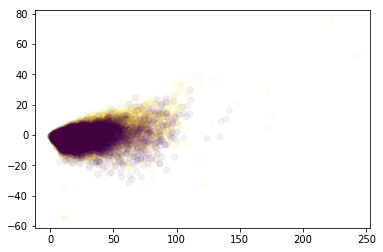

In [37]:
plt.scatter(data2D[:,0], data2D[:,1], c=Yte, alpha=0.05)
plt.show()

In [38]:
tf_transformer = TfidfTransformer()
Xtr_tf_idf = tf_transformer.fit_transform(Xtr)
Xte_tf_idf = tf_transformer.fit_transform(Xte)


trunSVD = TruncatedSVD(n_components=2)
data2D_tf_idf = trunSVD.fit_transform(Xtr_tf_idf);

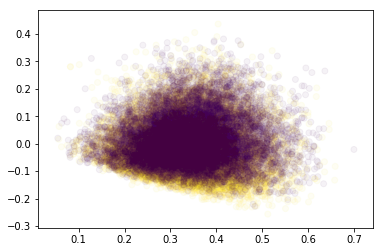

In [39]:
plt.scatter(data2D_tf_idf[:,0], data2D_tf_idf[:,1], c=Yte, alpha=0.05)
plt.show()

## KMeans

In [40]:
k = 2

learner = KMeans(n_clusters=k, max_iter=100, n_jobs=2)
learner.fit(Xtr_tf_idf)

KeyboardInterrupt: 

In [ ]:
Yhat_te = learner.fit_predict(Xte_tf_idf)

fp, tp, thresholds = metrics.roc_curve(Yte, Yhat_te)
print(metrics.auc(fp, tp))

In [ ]:
k = 2

learner = KMeans(n_clusters=k, max_iter=100, n_jobs=2)
learner.fit(Xtr)
Yhat_te = learner.fit_predict(Xte)

fp, tp, thresholds = metrics.roc_curve(Yte, Yhat_te)
print(metrics.auc(fp, tp))